In [96]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [97]:
players = pd.read_csv("../data/fifa_22_player/players_22.csv")
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [98]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [99]:
players = players.dropna(subset=features)

In [100]:
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


#### Steps
1. Scale the data
2. Randomly select centroids (means)
3. Assign each data points to their closed centroid
4. Updated the centroids of the newly formed clusters
5. Repeats steps 3 and 4 until the same centoids (convergences)

In [101]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [102]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
overall,19165.0,4.670472,1.346635,1.0,3.739130,4.717391,5.500000,10.0
potential,19165.0,5.319998,1.191076,1.0,4.521739,5.304348,6.086957,10.0
wage_eur,19165.0,1.219443,0.501528,1.0,1.012876,1.064378,1.193133,10.0
value_eur,19165.0,1.131826,0.353229,1.0,1.021620,1.044817,1.092370,10.0
age,19165.0,4.063345,1.575838,1.0,2.666667,4.000000,5.333333,10.0


In [103]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [104]:
# Getting one random centroid from the data
centroid = data.apply(lambda x: float(x.sample())) # float 
centroid

overall      4.521739
potential    5.891304
wage_eur     1.000000
value_eur    1.020460
age          4.666667
dtype: float64

In [105]:
# Randomly select centroids 
def random_centroids(data, K):
    centroids = []
    for k_i in range(K):
        centroid = data.apply(lambda x: float(x.sample())) # float 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
    
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,4.717391,2.760870,2.173913,5.304348,2.956522
potential,5.304348,4.521739,3.934783,7.065217,3.739130
wage_eur,1.038627,2.094421,1.090129,1.012876,1.010300
value_eur,1.033218,1.301143,1.045976,1.050616,1.008397
age,2.333333,4.000000,2.333333,2.666667,3.333333


In [106]:
np.sqrt(((data - centroids.iloc[:, 0]) ** 2).sum(axis=1))

0        12.170502
1        11.694066
2        10.932898
3        11.457795
4        12.812661
           ...    
19234     5.299436
19235     4.409615
19236     4.871557
19237     4.308627
19238     4.308627
Length: 19165, dtype: float64

In [107]:
# Assign each data points to their closest centroid
def assign_cluster_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

cluster_labels = assign_cluster_labels(data, centroids)
cluster_labels[:10]

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
dtype: int64

In [108]:
for cluster_label, cluster_data_points in  data.groupby(cluster_labels):
    print(f"Cluster Name: {cluster_label}")
    print(f"Cluster {cluster_label} Data Points\n {cluster_data_points[:2]}\n")

Cluster Name: 0
Cluster 0 Data Points
        overall  potential  wage_eur  value_eur       age
2866  6.086957   5.695652  1.218884   1.143404  2.666667
2871  6.086957   5.695652  1.399142   1.166601  2.666667

Cluster Name: 1
Cluster 1 Data Points
        overall  potential  wage_eur  value_eur       age
1474  6.478261   6.086957  1.579399   1.028579  9.000000
1970  6.282609   5.891304  1.038627   1.021620  8.333333

Cluster Name: 2
Cluster 2 Data Points
         overall  potential  wage_eur  value_eur       age
16142  3.347826   4.521739  1.000000   1.019300  2.333333
16149  3.347826   4.717391  1.038627   1.022779  2.333333

Cluster Name: 3
Cluster 3 Data Points
      overall  potential  wage_eur  value_eur       age
0  10.000000   9.608696  9.227468   4.618307  7.000000
1   9.804348   9.413043  7.939914   6.543654  6.333333

Cluster Name: 4
Cluster 4 Data Points
        overall  potential  wage_eur  value_eur       age
8716  4.717391   4.326087  1.012876   1.041337  4.666667
8799  

In [109]:
# Updated the centroids of the newly formed clusters
def new_centroids(data, labels, K):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

new_centr = new_centroids(data, cluster_labels, 5)
new_centr

,0,1,2,3,4
overall,4.374888,4.761542,2.260566,5.980113,3.531039
potential,5.431007,4.398880,4.492866,6.599382,3.872706
wage_eur,1.078995,1.090358,1.012707,1.469947,1.030619
value_eur,1.052369,1.030501,1.011294,1.295977,1.019783
age,3.134870,6.090601,2.060986,3.856962,3.984793


In [110]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [111]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

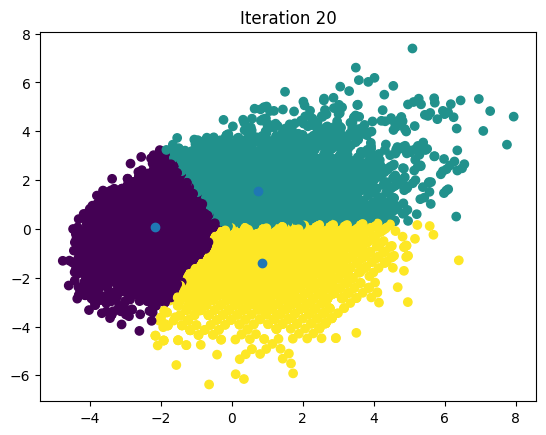

In [112]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()

iteration = 1
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = assign_cluster_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [113]:
centroids

,0,1,2
overall,3.206838,5.806043,4.784633
potential,4.928473,6.497993,4.506962
wage_eur,1.028505,1.420001,1.118904
value_eur,1.026614,1.285501,1.044980
age,2.518708,3.596161,5.472247


In [114]:
labels.value_counts()

2    7173
0    6223
1    5769
Name: count, dtype: int64

In [115]:
players[labels==0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


#### Comparing with Sci-kit learn

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [117]:
kmeans.cluster_centers_

array([[4.81333555, 4.51146366, 1.11484251, 1.0404768 , 5.6275827 ],
       [3.58394407, 5.18985489, 1.03911227, 1.03504507, 2.714495  ],
       [6.20144452, 6.61179679, 1.64579696, 1.40791443, 4.1020701 ]])

In [118]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,4.813336,3.583944,6.201445
potential,4.511464,5.189855,6.611797
wage_eur,1.114843,1.039112,1.645797
value_eur,1.040477,1.035045,1.407914
age,5.627583,2.714495,4.102070


In [119]:
centroids

,0,1,2
overall,3.206838,5.806043,4.784633
potential,4.928473,6.497993,4.506962
wage_eur,1.028505,1.420001,1.118904
value_eur,1.026614,1.285501,1.044980
age,2.518708,3.596161,5.472247
